In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
import pandas as pd
import numpy as np

In [2]:
pred_dat = pd.read_csv('pred_dat.csv')
pred_dat[:5]

Sentence Gene1 Gene2  prediction
0  , Molecular testing guideline for se-lection o...  EGFR   ALK           2
1  26 Although there was no dif-ference in the fr...  EGFR  KRAS           2
2   Blood samples of allpatients are to be extrac...    CR    CT           2
3   Since our model suggest that co-oc-currence o...  EGFR  HER2           0
4   In addition, because the T263P mutation is th...  EGFR  HER2           1

In [3]:
kegg_genes_dict = {'PIK3CA_B_D': 'K00922', 'PLCG1': 'K01116', 'FHIT': 'K01522', 'CDK4': 'K02089', 'CDK6': 'K02091', 'BAD': 'K02158', 'BAX': 'K02159', 'PIK3R1_2_3': 'K02649', 'PRKCA': 'K02677', 'HRAS': 'K02833', 'SOS': 'K03099', 'POLK': 'K03511', 'EGF': 'K04357', 'EGFR': 'K04361', 'ERBB1': 'K04361', 'GRB2': 'K04364', 'BRAF': 'K04365', 'RAF1': 'K04366', 'MAP2K1': 'K04368', 'MEK1': 'K04368', 'MAP2K2': 'K04369', 'MEK2': 'K04369', 'ERK': 'K04371', 'MAPK1_3': 'K04371', 'CASP9': 'K04399', 'GADD45': 'K04402', 'STK4': 'K04411', 'MST1': 'K04411', 'TP53': 'K04451', 'P53': 'K04451', 'AKT': 'K04456', 'CCND1': 'K04503', 'STAT3': 'K04692', 'ERBB2': 'K05083', 'HER2': 'K05083', 'CD340': 'K05083', 'ALK': 'K05119', 'CD246': 'K05119', 'PLCG2': 'K05859', 'PDPK1': 'K06276', 'RB1': 'K06618', 'E2F3': 'K06620', 'CDKN2A': 'K06621', 'P16': 'K06621', 'INK4A': 'K06621', 'CDKN1A': 'K06625', 'P21': 'K06625', 'CIP1': 'K06625', 'KRAS': 'K07827', 'KRAS2': 'K07827', 'NRAS': 'K07828', 'RASSF5': 'K08015', 'RAPL': 'K08015', 'RXRA': 'K08524', 'NR2B1': 'K08524', 'RXRB': 'K08525', 'NR2B2': 'K08525', 'RXRG': 'K08526', 'NR2B3': 'K08526', 'RARB': 'K08528', 'NR1B2': 'K08528', 'TGFA': 'K08774', 'ARAF': 'K08845', 'ARAF1': 'K08845', 'E2F2': 'K09389', 'FOXO3': 'K09408', 'RASSF1': 'K09850', 'DDB2': 'K10140', 'JAK3': 'K11218', 'STAT5A': 'K11223', 'STAT5B': 'K11224', 'BAK': 'K14021', 'BAK1': 'K14021', 'EML4': 'K15420', 'E2F1': 'K17454', 'PRKCB': 'K19662', 'PRKCG': 'K19663', 'K-RAS': 'K07827', 'N-RAS': 'K07827', 'RAS': 'K07827', 'H-RAS': 'K02833', 'HER-2': 'K05083', 'PLCG-1': 'K01116', 'PLCG-2': 'K05859', 'STAT': 'K11224', 'MEK': 'K04368'}

In [4]:
import json
f = open('merged_dic.json', encoding='utf-8')
all_genes_dict = json.load(f)
f.close()
 

In [5]:
kegg_genes = list(kegg_genes_dict.keys())
all_genes = list(all_genes_dict.keys())

In [6]:
len(kegg_genes)

86

In [7]:
all_pairs = []
for i in range(len(pred_dat)):
    if pred_dat.iloc[i,:]['prediction'] != 1:
        all_pairs.append((pred_dat.iloc[i,1], pred_dat.iloc[i,2]))

related_pairs = []
for i in range(len(pred_dat)):
    if pred_dat.iloc[i,:]['prediction'] != 1 and (pred_dat.iloc[i,1] in kegg_genes or pred_dat.iloc[i,2] in kegg_genes):
        related_pairs.append((pred_dat.iloc[i,1], pred_dat.iloc[i,2]))


kegg_pairs = []
for i in range(len(pred_dat)):
    if pred_dat.iloc[i,:]['prediction'] != 1 and (pred_dat.iloc[i,1] in kegg_genes and pred_dat.iloc[i,2] in kegg_genes):
        kegg_pairs.append((pred_dat.iloc[i,1], pred_dat.iloc[i,2]))


In [8]:
related_genes = []
for pair in related_pairs:
    for gene in pair:
        if gene not in kegg_genes: 
            related_genes.append(gene)
       

In [9]:
all_genes = list(set(all_genes))
related_genes = list(set(related_genes))  
kegg_genes = list(set(kegg_genes))

In [10]:
len(related_genes)

277

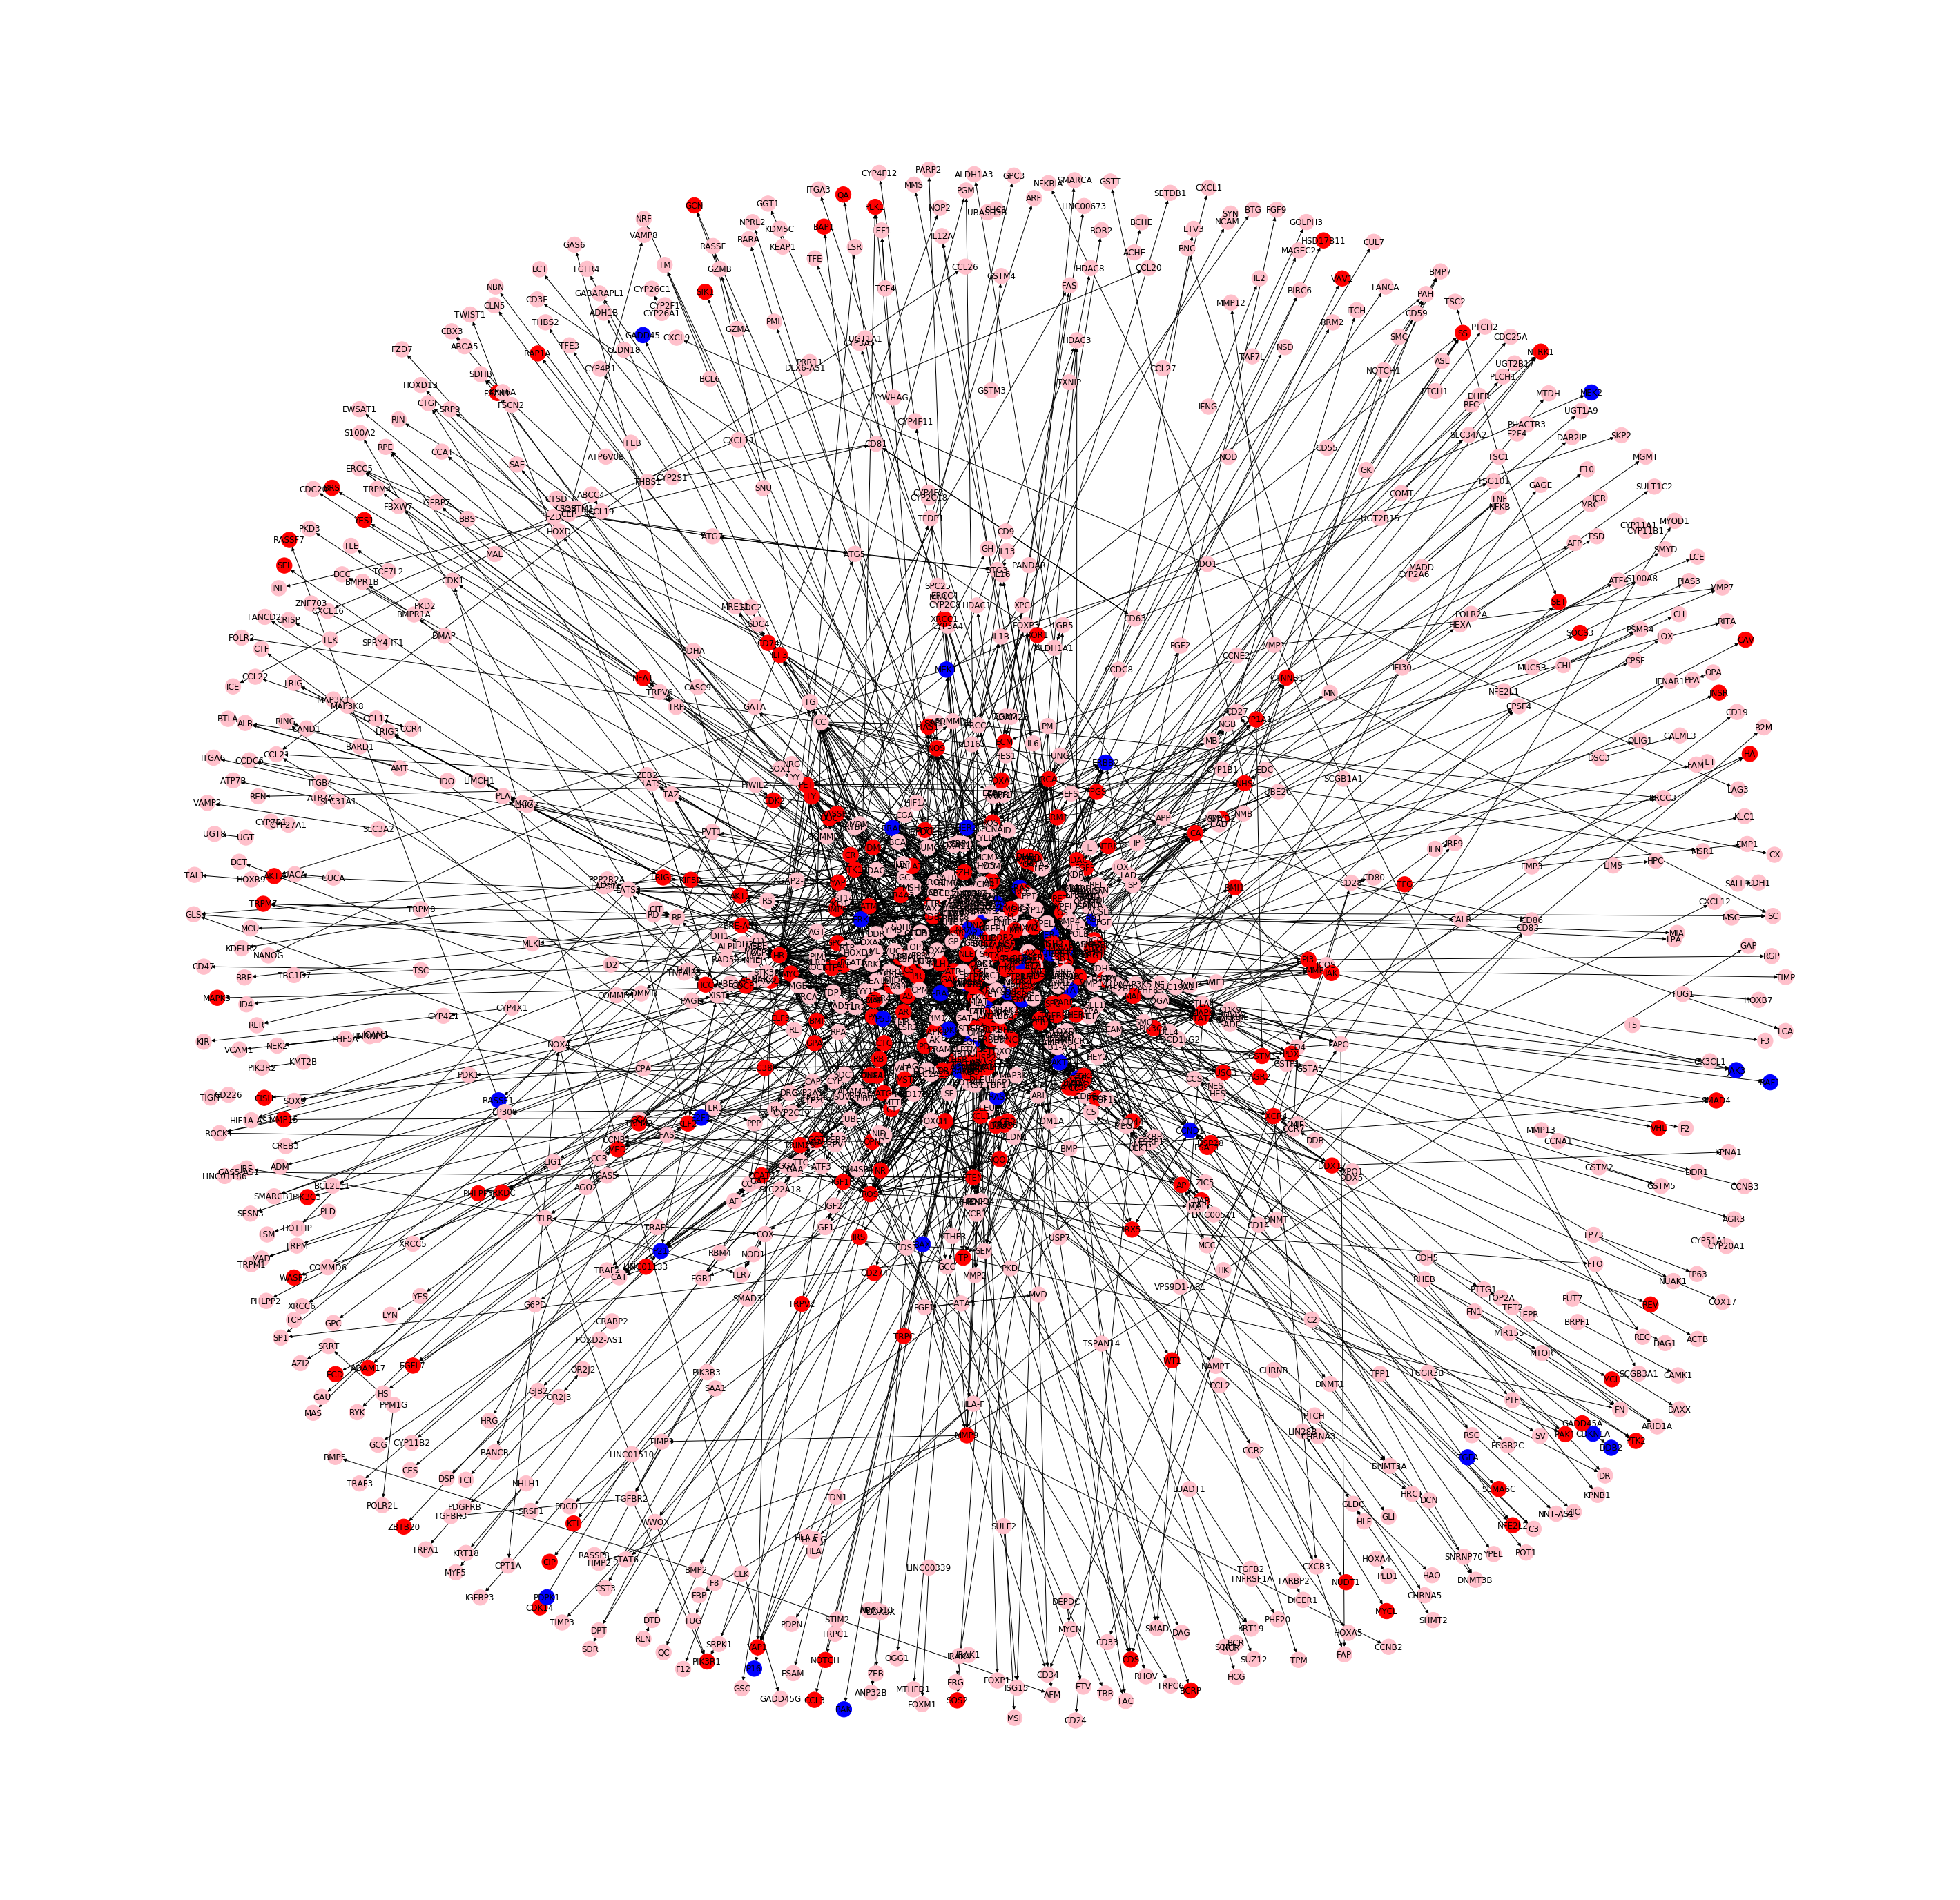

In [13]:
# Pink: Unrelated Genes. Red: Related Genes. Yellow: Knows Genes
G = nx.DiGraph()

G.add_edges_from(all_pairs)

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}
color_map = []
for node in G:
    if node in kegg_genes:
        color_map.append('blue')
    elif node in related_genes:
        color_map.append('red')
    else:
        color_map.append('pink')
        
        
pos=nx.spring_layout(G)
node_labels = {node:node for node in G.nodes()}
plt.figure(1,figsize=(50,50)) 
nx.draw_networkx_labels(G, pos)
nx.draw(G,pos, node_color = color_map, node_size=500)
pylab.show()

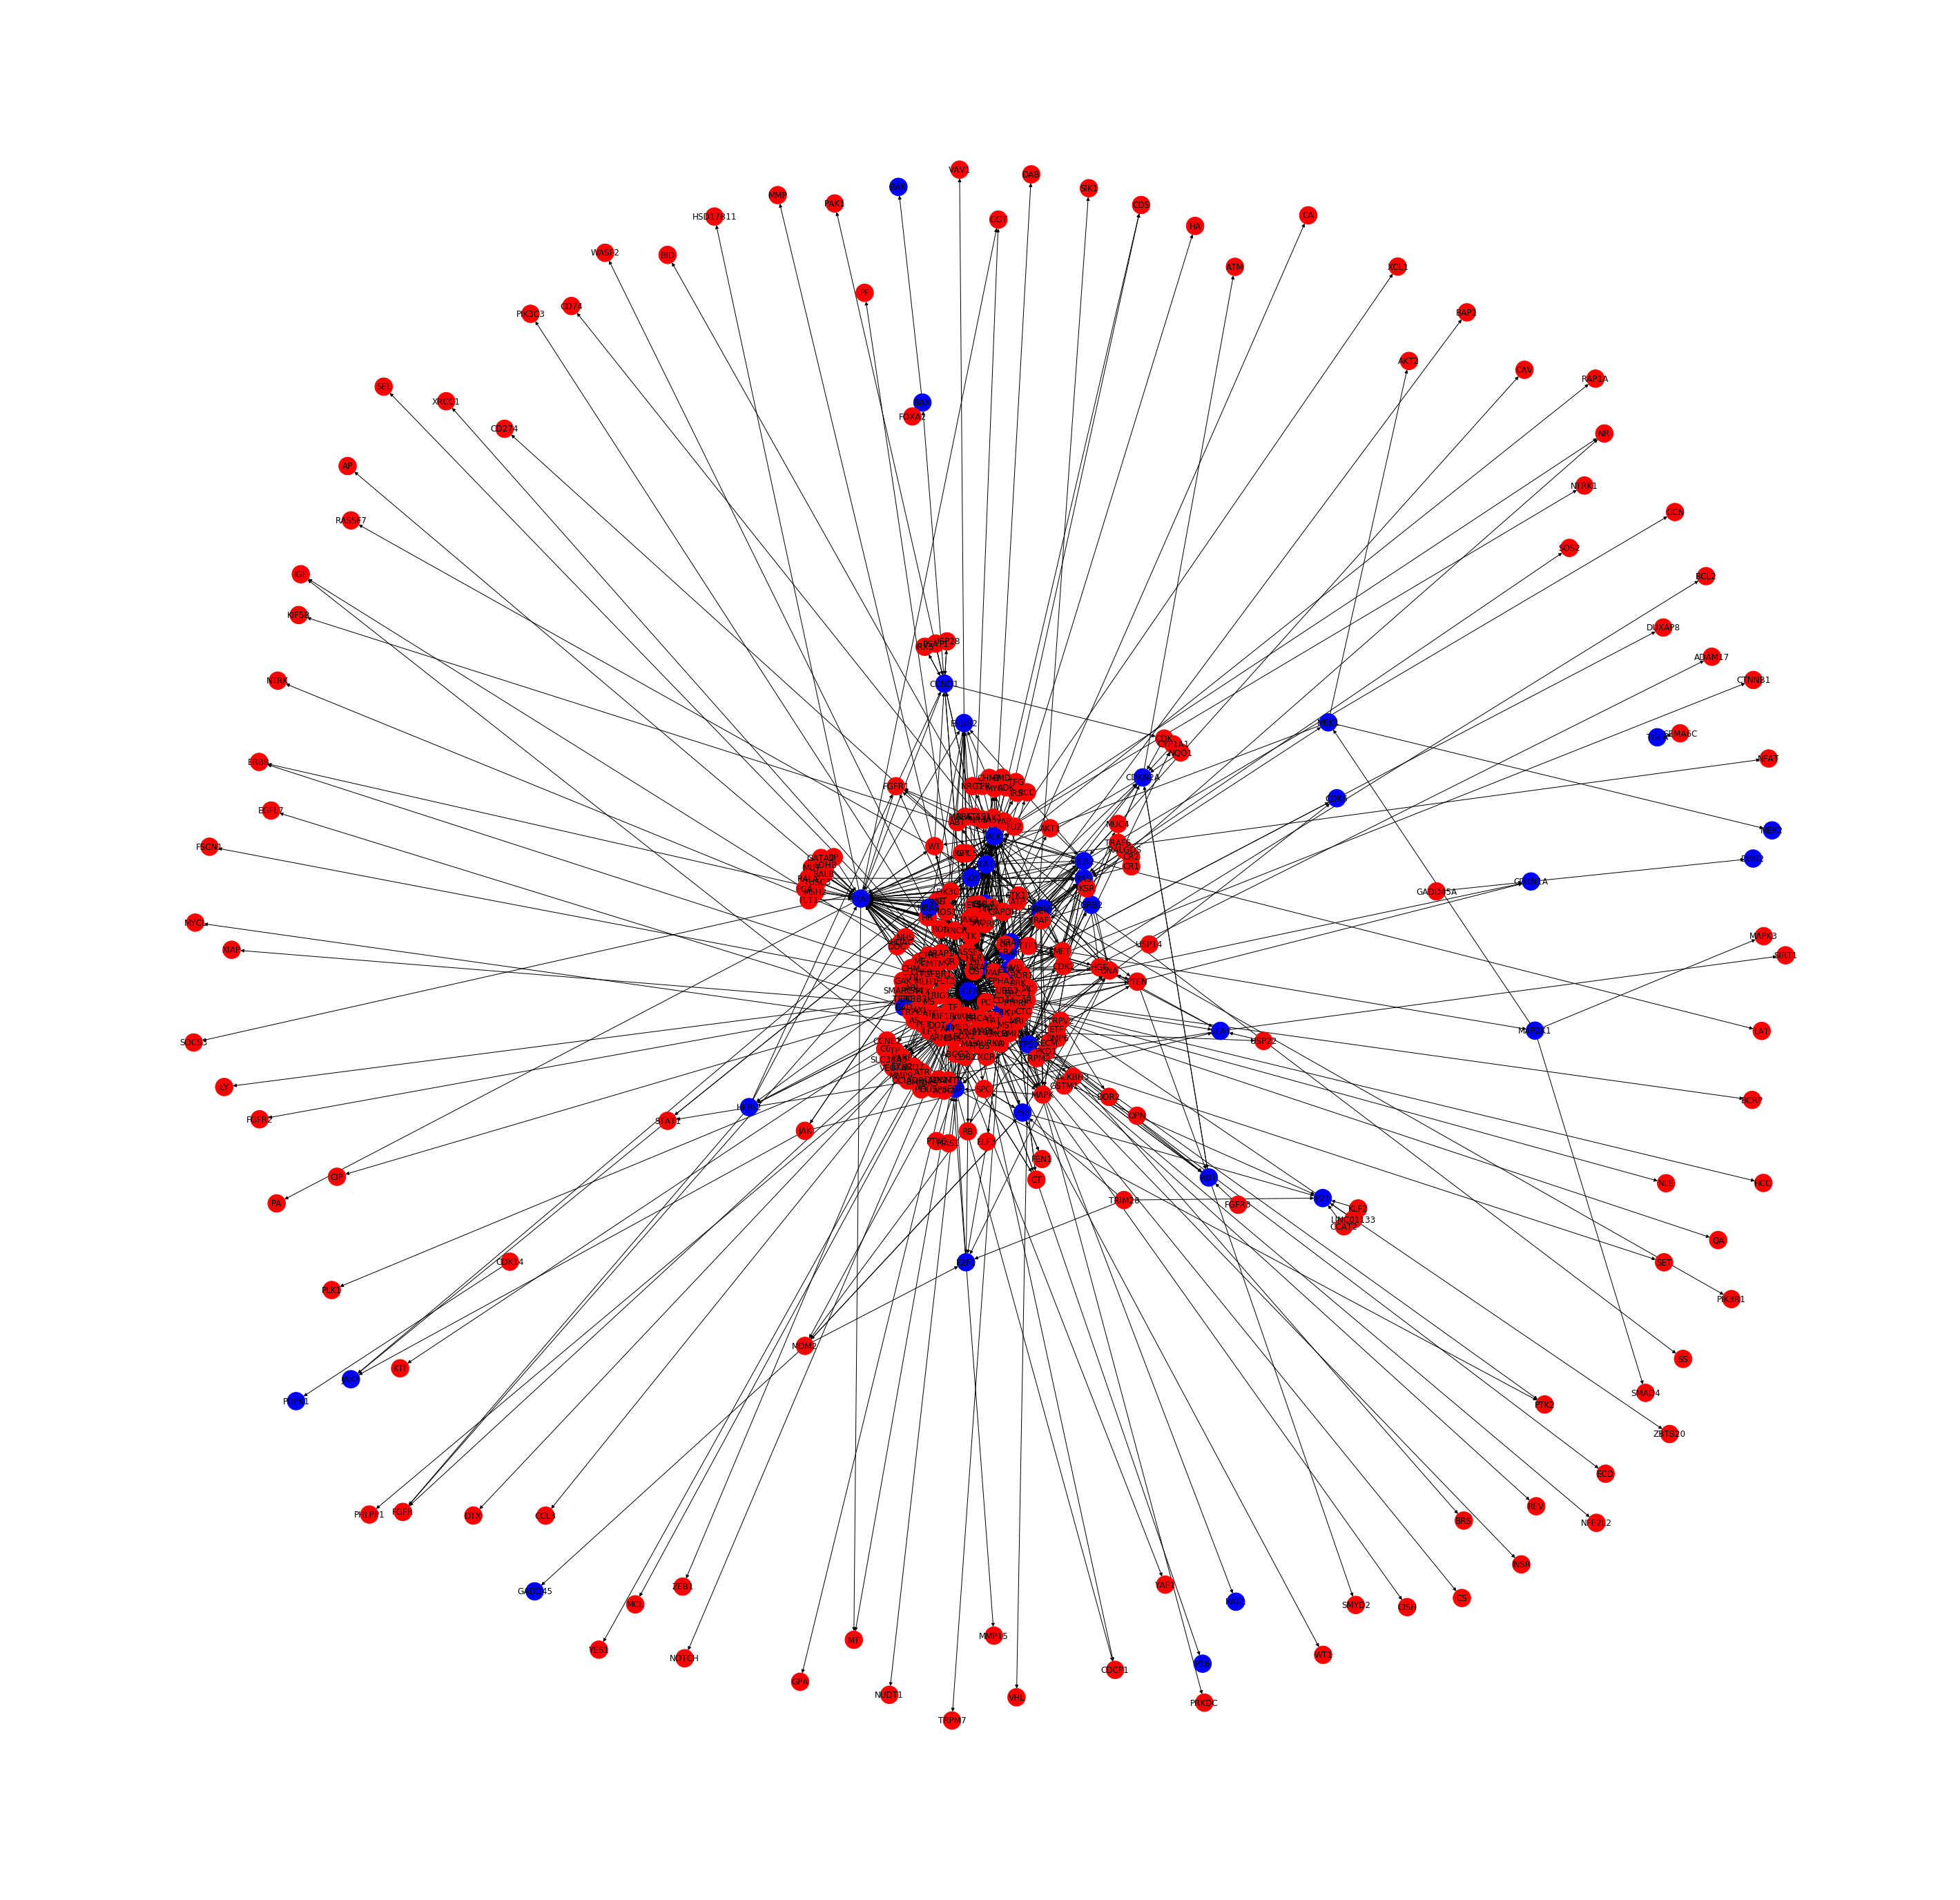

In [17]:
G = nx.DiGraph()

G.add_edges_from(related_pairs)

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}
color_map = []
for node in G:
    if node in kegg_genes:
        color_map.append('blue')
    elif node in related_genes:
        color_map.append('red')
        
        
pos=nx.spring_layout(G)
node_labels = {node:node for node in G.nodes()}
plt.figure(1,figsize=(50,50)) 
nx.draw_networkx_labels(G, pos)
nx.draw(G,pos, node_color = color_map, node_size=650)
pylab.show()

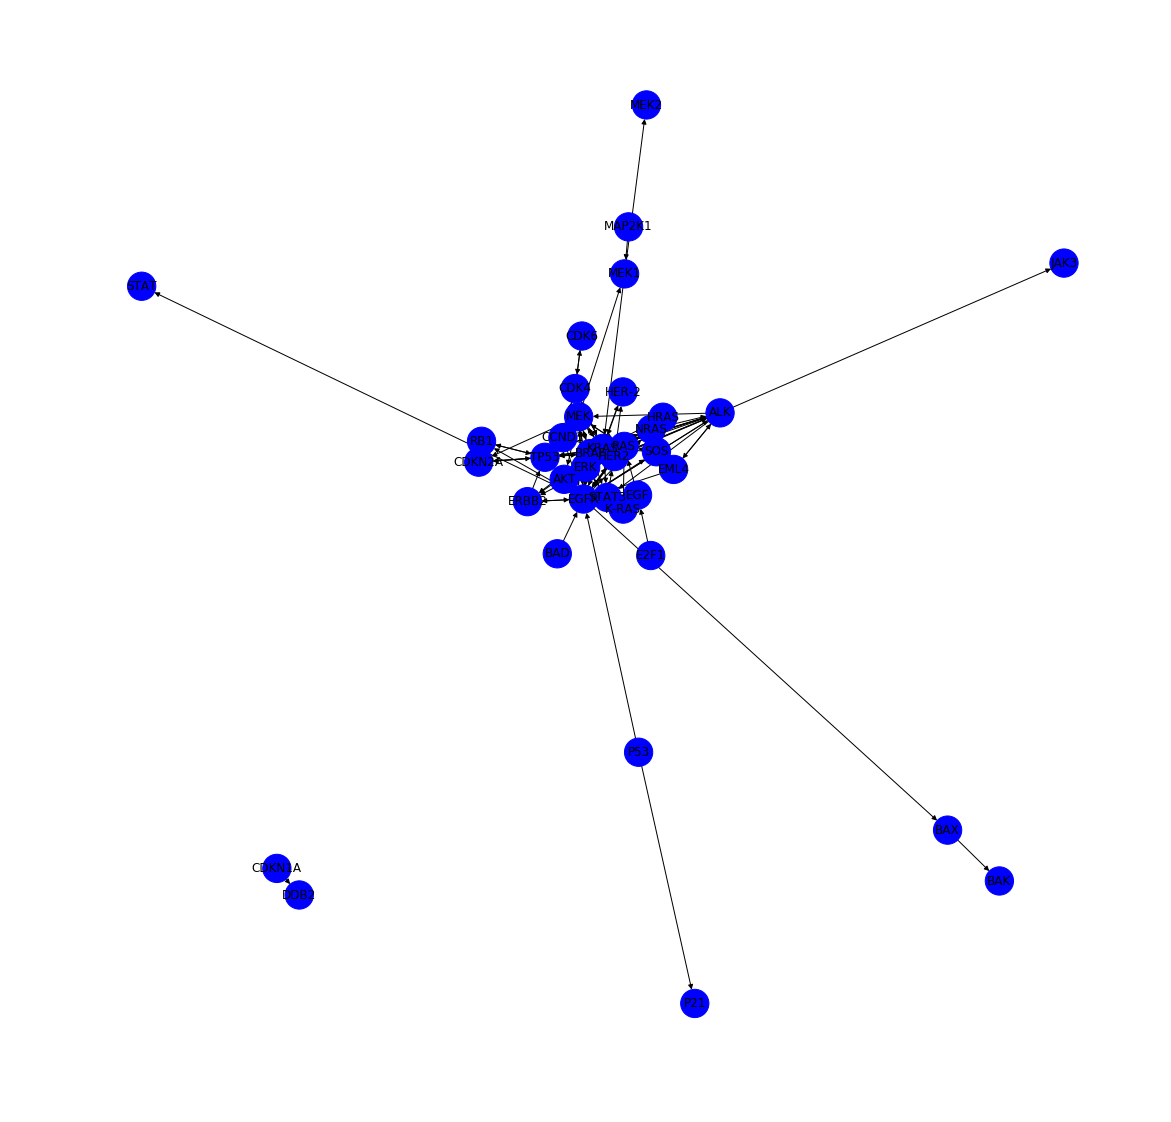

In [48]:
G = nx.DiGraph()

G.add_edges_from(kegg_pairs)

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}
color_map = ['blue'] * len(kegg_pairs)
        
        
pos=nx.spring_layout(G)
node_labels = {node:node for node in G.nodes()}
plt.figure(1,figsize=(20,20)) 
nx.draw_networkx_labels(G, pos)
nx.draw(G,pos, node_color = color_map, node_size=800)
pylab.show()